<center>
<h1>Iris Dataset</h1>
<img src="iris.png"/>
<img src="data-image.png"/>
</center>

## Import Libraries

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [85]:
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target
X = X.drop(['sepal width (cm)','petal width (cm)',], axis=1)
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]


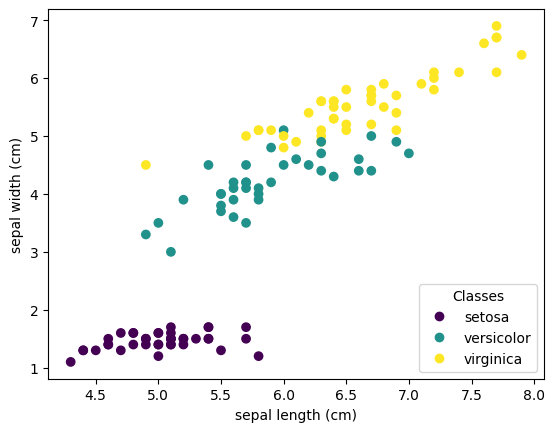

In [86]:
_, ax = plt.subplots()
scatter = ax.scatter(X_train["sepal length (cm)"], X_train["petal length (cm)"], c=y_train)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes");

In [90]:
# Decision Tree Classification
from sklearn.tree import  DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy")
decisionTree.fit(X_train, y_train);
y_pred = decisionTree.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [91]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


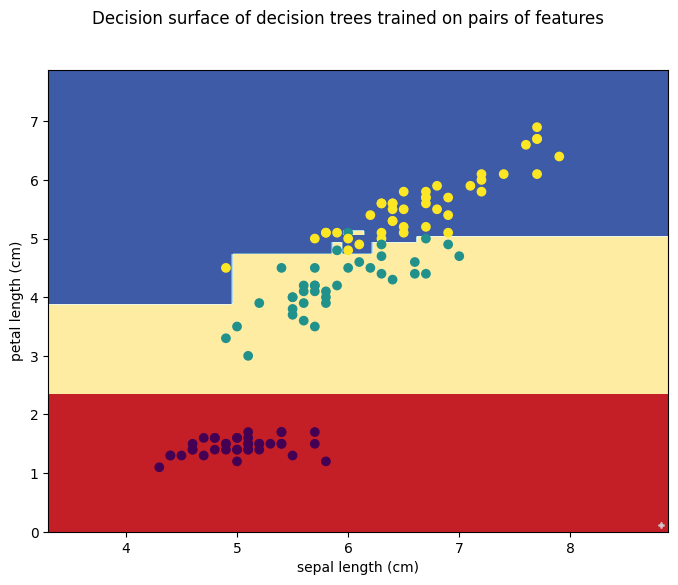

In [92]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 2]]):
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = decisionTree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])


plt.scatter(X_train["sepal length (cm)"], X_train["petal length (cm)"], c=y_train);
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


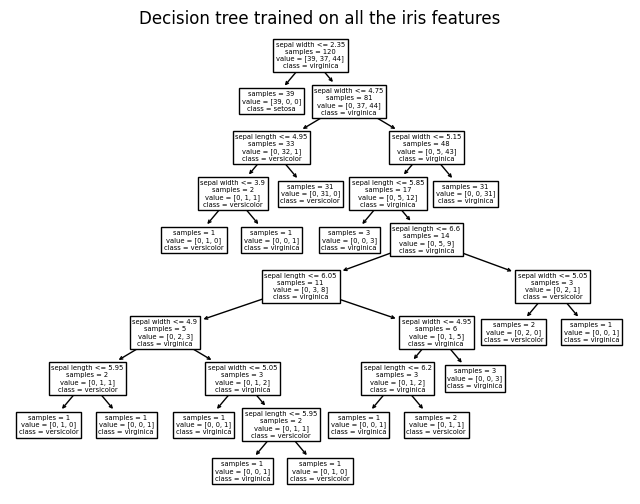

In [94]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
class_names = ['setosa', 'versicolor', 'virginica']
clf = decisionTree.fit(X_train, y_train)
plot_tree(clf,feature_names=['sepal length','sepal width','petal length','petal width'], class_names= class_names, filled = False, impurity= False)
plt.title("Decision tree trained on all the iris features")
plt.show()

## Random Forests

In [95]:
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [99]:
from sklearn.ensemble import RandomForestClassifier
decisionTree = RandomForestClassifier(n_estimators=1000, random_state=2)
decisionTree.fit(X_train, y_train);
y_pred = decisionTree.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0
